# SlidingRadial Perturber Tutorial

## Introduction
This notebook will demonstrate how to use the ``SlidingRadial`` perturbation implementation.
We will show applying a resulting mask to a reference image via the ``occlude_image_batch`` utility where the "fill" is a blurred version of the reference image for alpha blending.

This method of image perturbation is most notably used in [this paper](https://arxiv.org/abs/1711.00138) related to providing explanations in the reinforcement learning domain.

<br>

To run this notebook in Colab, use the link below:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/XAITK/xaitk-saliency/blob/master/docs/examples/Radial_Image_Perturbation.ipynb)

# Set Up Environment
**Note for Colab users**: after setting up the environment, you may need to "Restart Runtime" in order to resolve package version conflicts (see the [README](https://github.com/XAITK/xaitk-saliency/blob/master/docs/examples/README.md#run-the-notebooks-from-colab) for more info).

In [1]:
import os
import sys  # noqa

# Python dependencies
!{sys.executable} -m pip install -qU pip
!{sys.executable} -m pip install -q xaitk-saliency

# Data dependencies
os.makedirs("data", exist_ok=True)
image_filepath = "data/Grace_Hopper.jpg"
![ ! -f "{image_filepath}" ] && wget \
https://upload.wikimedia.org/wikipedia/commons/5/55/Grace_Hopper.jpg -O {image_filepath}

In [2]:
# Setup our imports
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
from scipy.ndimage import gaussian_filter

from xaitk_saliency.impls.perturb_image.sliding_radial import SlidingRadial
from xaitk_saliency.utils.masking import occlude_image_batch

# Use JPEG format for inline visualizations here.
%config InlineBackend.figure_format = "jpeg"

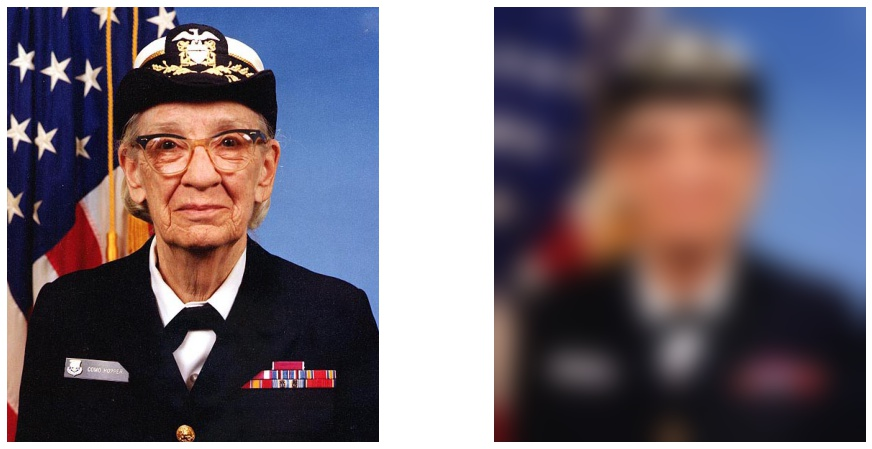

In [3]:
# Load the image as a matrix and blur it.

gh_mat = np.asarray(PIL.Image.open(image_filepath))

# Using a tuple sigma to prevent the kernel from venturing into the
# channel dimansion to maintain a color image.
gh_mat_blur = gaussian_filter(gh_mat, sigma=(20, 20, 0))

# Let's take a look!
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.axis(False)
plt.imshow(gh_mat)

plt.subplot(1, 2, 2)
plt.axis(False)
plt.imshow(gh_mat_blur)

pass  # reduce cell output

In [4]:
# Larger values for sigma take increasingly longer processing times.
# Something belonging to scipy's gaussian_filter.
masks = SlidingRadial(radius=(125, 125), stride=[200, 200], sigma=(20, 20)).perturb(gh_mat)
masks.shape

(12, 606, 517)

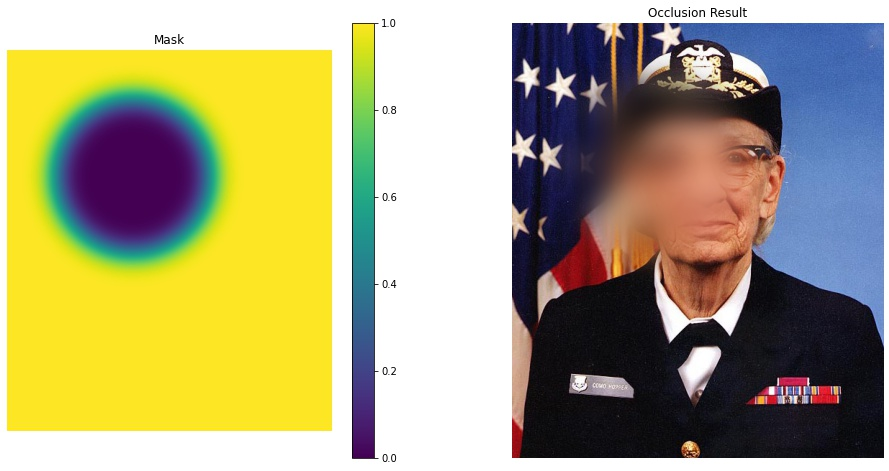

In [5]:
idx = 4

# apply one mask to the image, with blurred-image alpha blending.
gh_rad_occ = occlude_image_batch(gh_mat, masks[None, idx], gh_mat_blur)[0]

# Display the mask and the result blended image.
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Mask")
plt.axis(False)
plt.imshow(masks[idx], vmin=0, vmax=1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Occlusion Result")
plt.axis(False)
plt.imshow(gh_rad_occ)

pass  # reduce cell output